In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.preprocessing import LabelEncoder#for train test splitting
from sklearn.model_selection import train_test_split#for decision tree object
from sklearn.tree import DecisionTreeClassifier#for checking testing results
from sklearn.metrics import classification_report, confusion_matrix#for visualizing tree 
from sklearn.tree import plot_tree

In [31]:
df = pd.read_csv('telco1.csv')
df.head()
dfx = df.copy()

In [32]:
dfx = dfx.drop_duplicates()

In [33]:
dfx = dfx.drop(labels=['customerID', ], axis=1)

In [34]:
dfx.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7032 entries, 0 to 7031
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7032 non-null   object 
 1   SeniorCitizen     7032 non-null   int64  
 2   Partner           7032 non-null   object 
 3   Dependents        7032 non-null   object 
 4   tenure            7032 non-null   int64  
 5   PhoneService      7032 non-null   object 
 6   MultipleLines     7032 non-null   object 
 7   InternetService   7032 non-null   object 
 8   OnlineSecurity    7032 non-null   object 
 9   OnlineBackup      7032 non-null   object 
 10  DeviceProtection  7032 non-null   object 
 11  TechSupport       7032 non-null   object 
 12  StreamingTV       7032 non-null   object 
 13  StreamingMovies   7032 non-null   object 
 14  Contract          7032 non-null   object 
 15  PaperlessBilling  7032 non-null   object 
 16  PaymentMethod     7032 non-null   object 


In [35]:
dfx.shape

(7032, 20)

In [36]:
dfx.isnull().any()

gender              False
SeniorCitizen       False
Partner             False
Dependents          False
tenure              False
PhoneService        False
MultipleLines       False
InternetService     False
OnlineSecurity      False
OnlineBackup        False
DeviceProtection    False
TechSupport         False
StreamingTV         False
StreamingMovies     False
Contract            False
PaperlessBilling    False
PaymentMethod       False
MonthlyCharges      False
TotalCharges        False
Churn               False
dtype: bool

In [37]:
dfx.replace({'Yes': 1, 'No': 0, 'No internet service': 2}, inplace=True)

In [38]:
dfx.replace({'Month-to-month': 0, 'One year':1, 'Two year': 2}, inplace=True)

In [42]:
dfx.replace({'Male': 1, 'Female': 0}, inplace=True)

In [43]:
dfx.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,0,1,0,1,0,No phone service,DSL,0,1,0,0,0,0,0,1,Electronic check,29.85,29.85,0
1,1,0,0,0,34,1,0,DSL,1,0,1,0,0,0,1,0,Mailed check,56.95,1889.50,0
2,1,0,0,0,2,1,0,DSL,1,1,0,0,0,0,0,1,Mailed check,53.85,108.15,1
3,1,0,0,0,45,0,No phone service,DSL,1,0,1,1,0,0,1,0,Bank transfer (automatic),42.30,1840.75,0
4,0,0,0,0,2,1,0,Fiber optic,0,0,0,0,0,0,0,1,Electronic check,70.70,151.65,1


In [44]:
X = dfx.drop('Churn', axis=1)

In [52]:
X = dfx[['tenure', 'DeviceProtection', 'gender', 'OnlineSecurity', 'OnlineBackup']]

In [53]:
X.head(n=7032)

,tenure,DeviceProtection,gender,OnlineSecurity,OnlineBackup
0,1,0,0,0,1
1,34,1,1,1,0
2,2,0,1,1,1
3,45,1,1,1,0
4,2,0,0,0,0
...,...,...,...,...,...
7027,24,1,1,1,0
7028,72,1,0,0,1
7029,11,0,0,1,0
7030,4,0,1,0,0


In [54]:
target = df['Churn']
target.head()

0     No
1     No
2    Yes
3     No
4    Yes
Name: Churn, dtype: object

In [55]:
le = LabelEncoder()
target = le.fit_transform(target)

In [56]:
y = target

In [57]:
# Splitting the data - 80:20 ratio
X_train, X_test, y_train, y_test = train_test_split(X , y, test_size = 0.2, random_state = 42)
print("Training split input- ", X_train.shape)
print("Testing split input- ", X_test.shape)

Training split input-  (5625, 5)
Testing split input-  (1407, 5)


In [58]:
# Defining the decision tree algorithm
dtree=DecisionTreeClassifier()
dtree.fit(X_train,y_train)
print('Decision Tree Classifier Created')

Decision Tree Classifier Created


In [59]:
y_pred = dtree.predict(X_test)
print("Classification report - \n", classification_report(y_test,y_pred))

Classification report - 
               precision    recall  f1-score   support

           0       0.81      0.85      0.83      1033
           1       0.52      0.46      0.49       374

    accuracy                           0.74      1407
   macro avg       0.67      0.65      0.66      1407
weighted avg       0.73      0.74      0.74      1407



Text(0.5, 1.0, 'Accuracy Score: 0.7434257285003554')

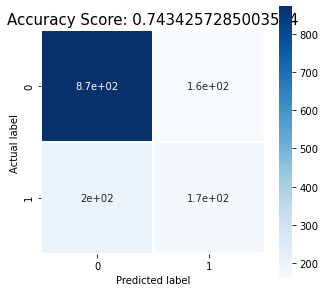

In [60]:
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(5,5))
sns.heatmap(data=cm,linewidths=.5, annot=True,square = True,  cmap = 'Blues')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
all_sample_title = 'Accuracy Score: {0}'.format(dtree.score(X_test, y_test))
plt.title(all_sample_title, size = 15)

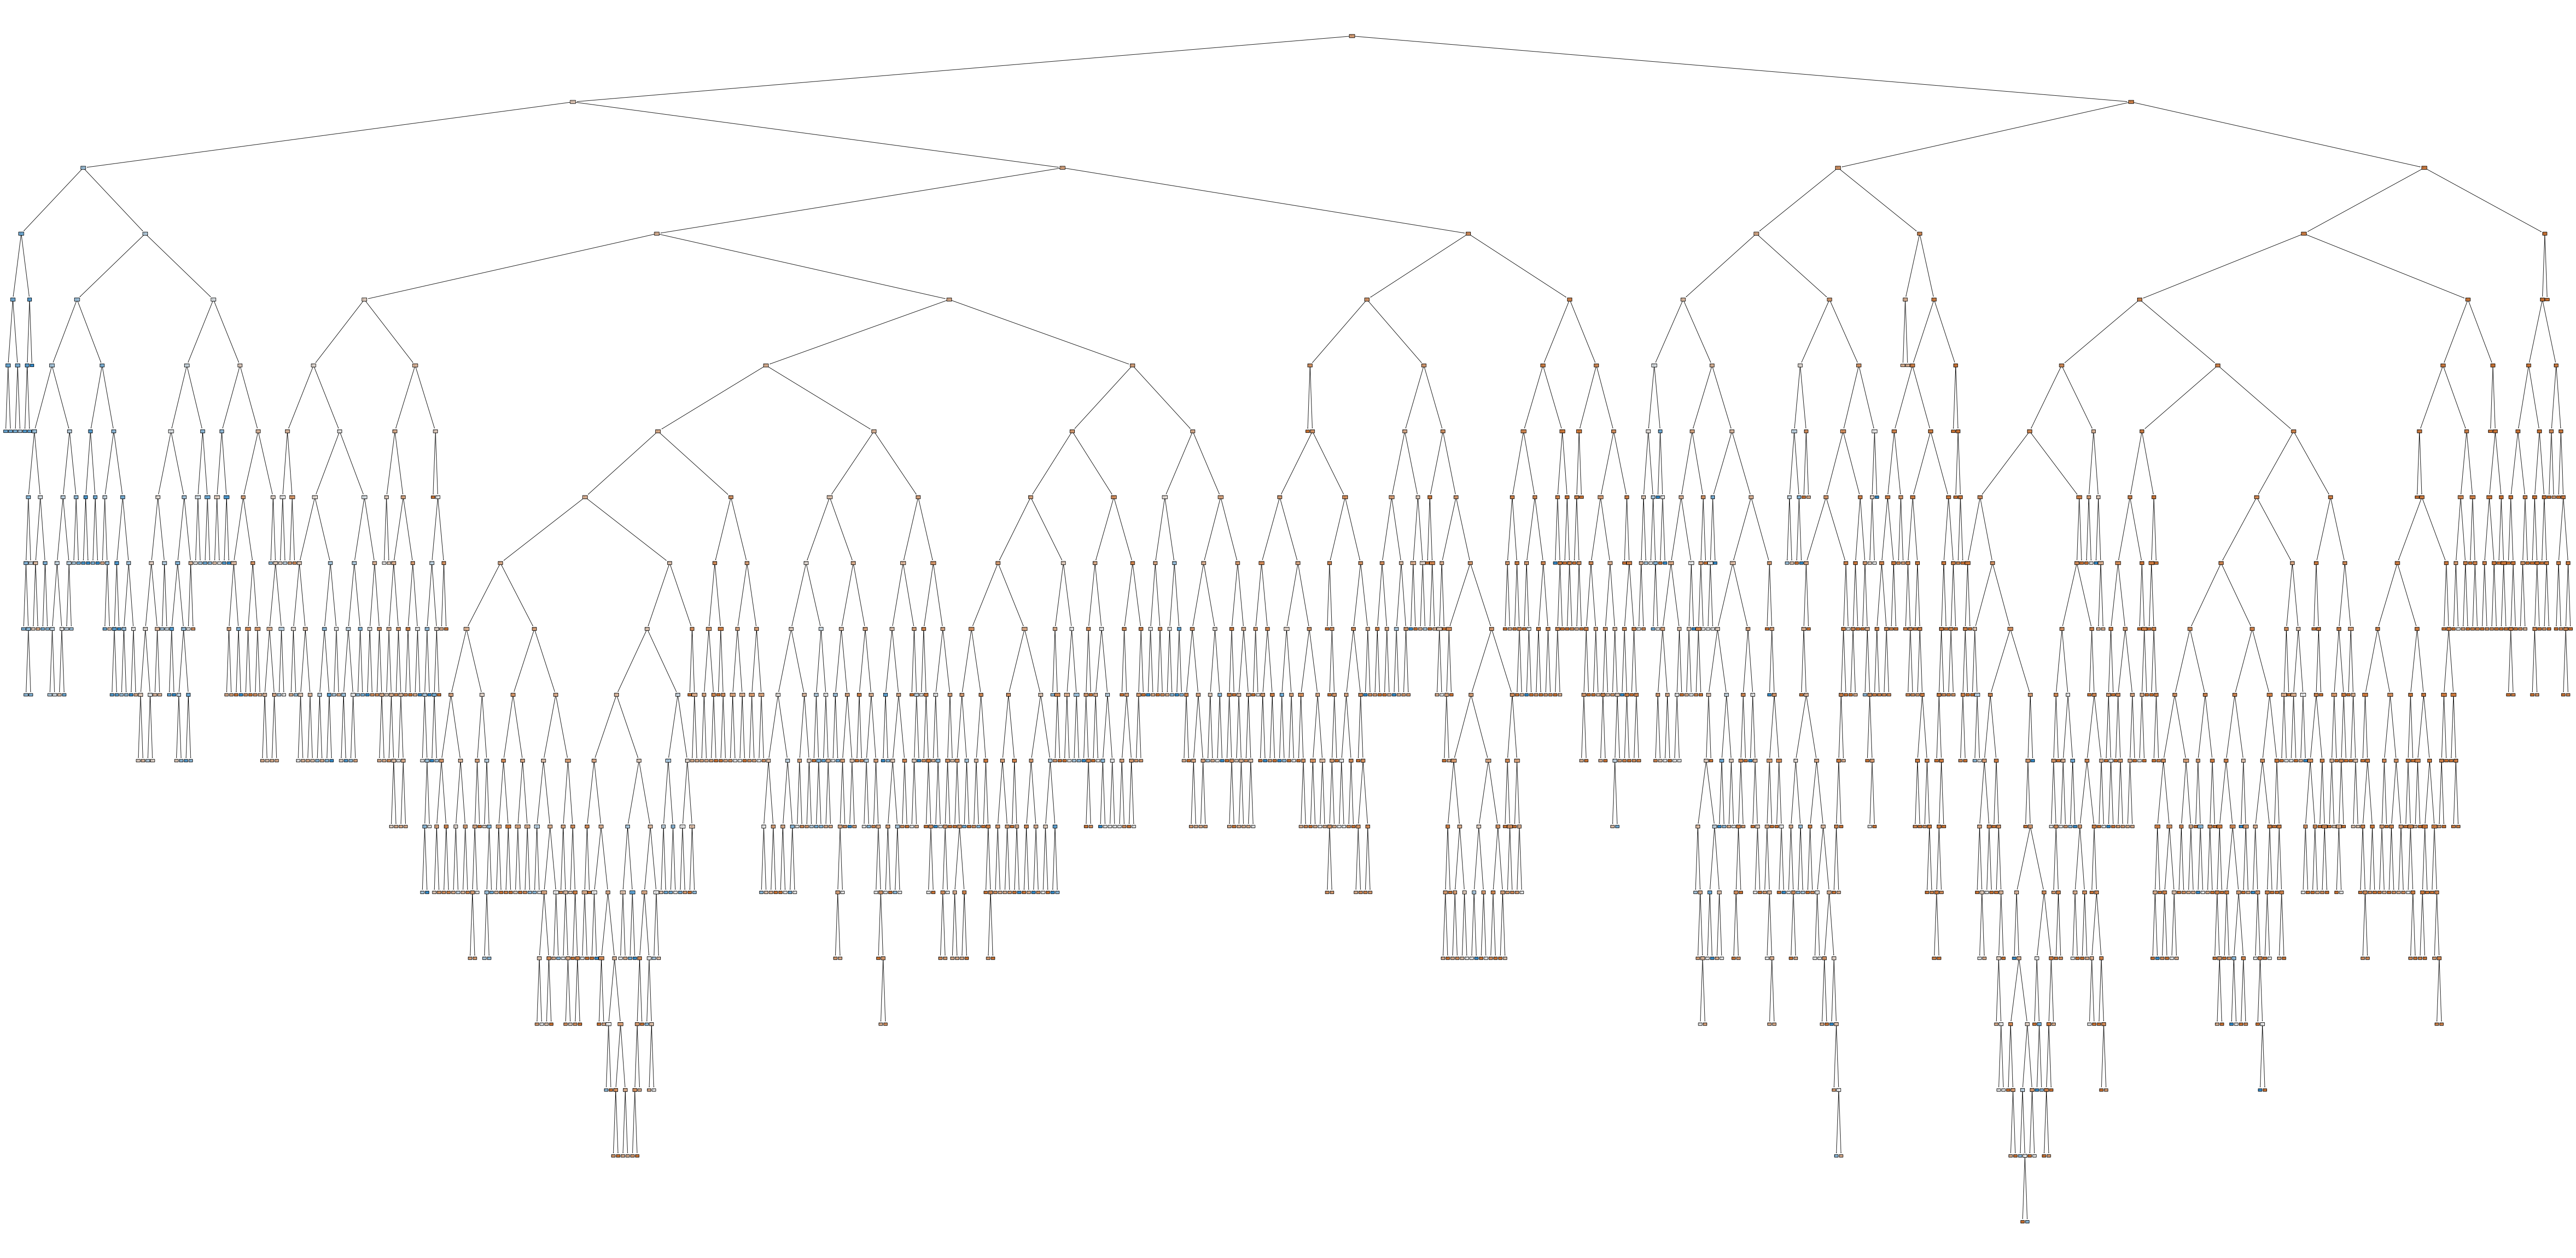

In [61]:
fig = plt.figure(figsize=(100,50))
_ = plot_tree(decision_tree=dtree, feature_names = dfx.columns, 
                     class_names =["Yes", "No"] , filled = True , precision = 4, rounded = True)
fig.savefig("decistion_tree.png")

In [64]:
from sklearn.ensemble import RandomForestClassifier

In [65]:
#Train the random forest classifier on training dataset
rf = RandomForestClassifier().fit(X_train,y_train)

In [66]:
rf

RandomForestClassifier()

In [67]:
rf.score(X_test, y_test)

0.7306325515280739

In [68]:
#make predictions on unseen data
predictions=rf.predict(X_test)

In [69]:
#import confusion matrix , classification report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

In [70]:
print(confusion_matrix(y_test, predictions))

[[847 186]
 [193 181]]


In [71]:
print(classification_report(y_test, predictions,target_names=["Genuine", "Fraud"]))

              precision    recall  f1-score   support

     Genuine       0.81      0.82      0.82      1033
       Fraud       0.49      0.48      0.49       374

    accuracy                           0.73      1407
   macro avg       0.65      0.65      0.65      1407
weighted avg       0.73      0.73      0.73      1407



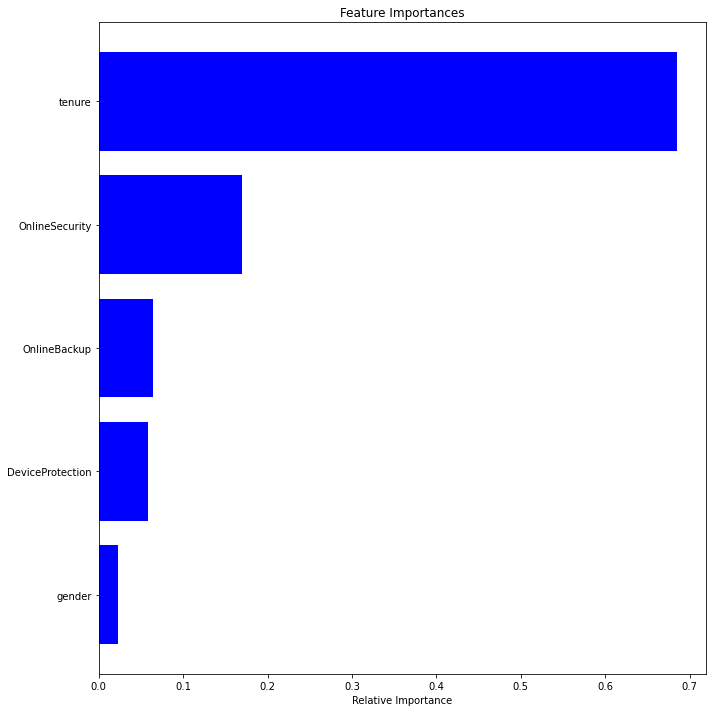

In [72]:
## Feature Importance 
features = X.columns
importances = rf.feature_importances_
indices = np.argsort(importances)
plt.figure(figsize=(10,10))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), features[indices])
plt.xlabel('Relative Importance')
plt.tight_layout()
plt.show()

In [73]:
from sklearn.model_selection import GridSearchCV

In [74]:
#fit the model
rf_model=RandomForestClassifier()

In [75]:
# Create the parameter grid based on the results of random search 
param_grid = {
    'bootstrap': [True],
    'max_depth': [40,50,60],
    'max_features': ['auto', 'sqrt', 'log2',.01, .5, .99],
    'n_estimators': [10,15,20,25,30]
}

In [76]:
#Run grid search algorithm
grid_search = GridSearchCV(estimator = rf_model, param_grid = param_grid, 
                          cv = 3, n_jobs = -1, verbose = 2)

In [77]:
#Fit the model on training data
grid_search.fit(X_train, y_train)

Fitting 3 folds for each of 90 candidates, totalling 270 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:    3.4s
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed:    5.2s
[Parallel(n_jobs=-1)]: Done 270 out of 270 | elapsed:    7.3s finished


GridSearchCV(cv=3, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'bootstrap': [True], 'max_depth': [40, 50, 60],
                         'max_features': ['auto', 'sqrt', 'log2', 0.01, 0.5,
                                          0.99],
                         'n_estimators': [10, 15, 20, 25, 30]},
             verbose=2)

In [78]:
#validate the new score of model
print("Test set score: {:.2f}".format(grid_search.score(X_test, y_test)))

Test set score: 0.74


In [79]:
print("Best parameters: {}".format(grid_search.best_params_))
print("Best cross-validation score: {:.2f}".format(grid_search.best_score_))

Best parameters: {'bootstrap': True, 'max_depth': 40, 'max_features': 0.99, 'n_estimators': 25}
Best cross-validation score: 0.74


In [80]:
print("Best estimator:\n{}".format(grid_search.best_estimator_))

Best estimator:
RandomForestClassifier(max_depth=40, max_features=0.99, n_estimators=25)


In [81]:
#Train the random forest classifier on training dataset
rf_tuned = RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=40, max_features=0.99, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=20, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False).fit(X_train,y_train)
#validate the model performance on unseen data
rf_tuned.score(X_test, y_test)
#make predictions on unseen data
tuned_predictions=rf_tuned.predict(X_test)

In [83]:
print(confusion_matrix(y_test, tuned_predictions))
print(classification_report(y_test, tuned_predictions,target_names=["Yes", "No"]))

[[837 196]
 [189 185]]
              precision    recall  f1-score   support

         Yes       0.82      0.81      0.81      1033
          No       0.49      0.49      0.49       374

    accuracy                           0.73      1407
   macro avg       0.65      0.65      0.65      1407
weighted avg       0.73      0.73      0.73      1407

